<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Train shape: (16512, 8) Test shape: (4128, 8)
Ridge Regression → RMSE: 0.746  R²: 0.576
      Feature  Coefficient
6    Latitude    -0.895885
7   Longitude    -0.868165
0      MedInc     0.852310
3   AveBedrms     0.370819
2    AveRooms    -0.304871
1    HouseAge     0.122460
5    AveOccup    -0.036627
4  Population    -0.002273
Lasso Regression → RMSE: 0.824  R²: 0.481
      Feature  Co

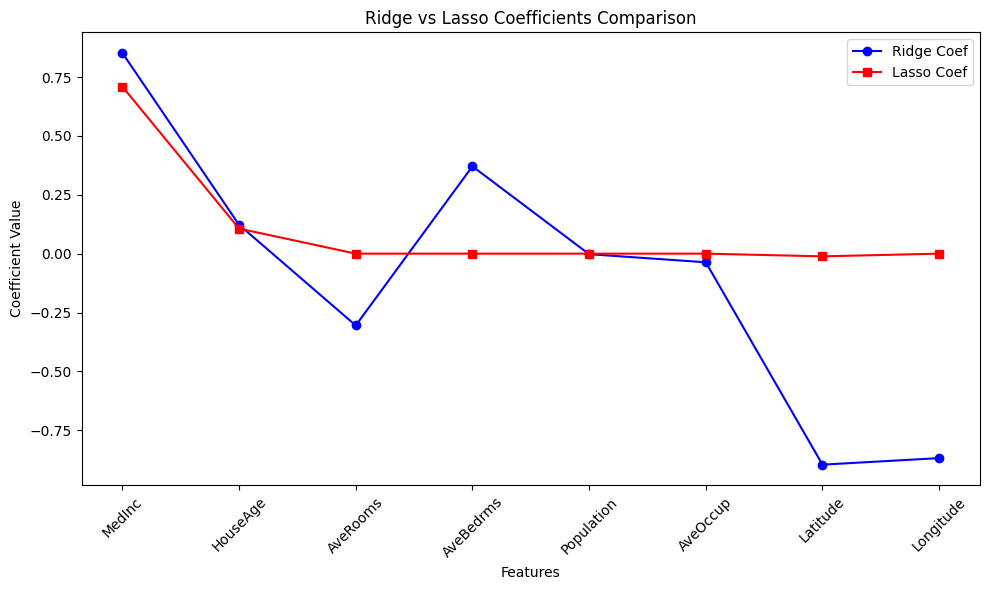

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

df.info()
df.describe()
df.shape
df.columns
df.isnull().sum()


X = df.drop('MedHouseVal', axis=1)   # target is “MedHouseVal”
y = df['MedHouseVal']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


ridge = Ridge(alpha=1.0)   # you can experiment with alpha values
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge   = r2_score(y_test, y_pred_ridge)
print("Ridge Regression → RMSE:", round(rmse_ridge,3),
      " R²:", round(r2_ridge,3))

ridge_coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
})
print(ridge_coeff.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False).head(10))


lasso = Lasso(alpha=0.1)   # again you can vary alpha
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso   = r2_score(y_test, y_pred_lasso)
print("Lasso Regression → RMSE:", round(rmse_lasso,3),
      " R²:", round(r2_lasso,3))

lasso_coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print(lasso_coeff.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False).head(10))


performance = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'RMSE': [rmse_ridge, rmse_lasso],
    'R² Score': [r2_ridge, r2_lasso]
})
print(performance)


plt.figure(figsize=(10,6))
plt.plot(ridge_coeff['Feature'], ridge_coeff['Coefficient'], 'o-', label='Ridge Coef', color='blue')
plt.plot(lasso_coeff['Feature'], lasso_coeff['Coefficient'], 's-', label='Lasso Coef', color='red')
plt.xticks(rotation=45)
plt.title("Ridge vs Lasso Coefficients Comparison")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.legend()
plt.tight_layout()
plt.show()
